In [1]:
import requests
from config import API_KEY
import pandas as pd
import numpy as np

## Get Data from eia API

In [2]:
eastCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R10_DPG.W"
midwest = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R20_DPG.W"
gulfCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R30_DPG.W"
rockyMountain = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R40_DPG.W"
westCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R50_DPG.W"

In [3]:
eastCoast_df = pd.DataFrame(requests.get(eastCoast).json()['series'][0]['data'])
midwest_df = pd.DataFrame(requests.get(midwest).json()['series'][0]['data'])
gulfCoast_df = pd.DataFrame(requests.get(gulfCoast).json()['series'][0]['data'])
rockyMountain_df = pd.DataFrame(requests.get(rockyMountain).json()['series'][0]['data'])
westCoast_df = pd.DataFrame(requests.get(westCoast).json()['series'][0]['data'])

In [4]:
eastCoast_df.rename(columns = {0:"week", 1:"price_eastCoast"}, inplace = True)
midwest_df.rename(columns = {0:"week", 1:"price_midwest"}, inplace = True)
gulfCoast_df.rename(columns = {0:"week", 1:"price_gulfCoast"}, inplace = True)
rockyMountain_df.rename(columns = {0:"week", 1:"price_rockyMountain"}, inplace = True)
westCoast_df.rename(columns = {0:"week", 1:"price_westCoast"}, inplace = True)

In [5]:
eastCoast_df['week'] = pd.to_datetime(eastCoast_df['week'])
midwest_df['week'] = pd.to_datetime(midwest_df['week'])
gulfCoast_df['week'] = pd.to_datetime(gulfCoast_df['week'])
rockyMountain_df['week'] = pd.to_datetime(rockyMountain_df['week'])
westCoast_df['week'] = pd.to_datetime(westCoast_df['week'])

In [6]:
prices_df = eastCoast_df.merge(midwest_df , on = "week", suffixes=('', ''))\
            .merge(gulfCoast_df , on = "week", suffixes=('', ''))\
            .merge(rockyMountain_df , on = "week", suffixes=('', ''))\
            .merge(westCoast_df , on = "week", suffixes=('', ''))

In [7]:
regions = ["eastCoast", "midwest", "gulfCoast", "rockyMountain", "westCoast"]
for region in regions:
    prices_df['change_' + region] = prices_df['price_' + region].diff()

In [8]:
prices_df

,week,price_eastCoast,price_midwest,price_gulfCoast,price_rockyMountain,price_westCoast,change_eastCoast,change_midwest,change_gulfCoast,change_rockyMountain,change_westCoast
0,2020-11-09,2.127,2.025,1.823,2.304,2.863,NaN,NaN,NaN,NaN,NaN
1,2020-11-02,2.149,2.026,1.862,2.320,2.869,0.022,0.001,0.039,0.016,0.006
2,2020-10-26,2.173,2.069,1.908,2.340,2.882,0.024,0.043,0.046,0.020,0.013
3,2020-10-19,2.196,2.057,1.905,2.359,2.887,0.023,-0.012,-0.003,0.019,0.005
4,2020-10-12,2.209,2.089,1.914,2.367,2.895,0.013,0.032,0.009,0.008,0.008
...,...,...,...,...,...,...,...,...,...,...,...
1436,1993-05-03,1.062,1.073,1.084,1.161,1.161,-0.007,-0.018,-0.004,0.018,-0.010
1437,1993-04-26,1.059,1.078,1.081,1.169,1.157,-0.003,0.005,-0.003,0.008,-0.004
1438,1993-04-19,1.054,1.067,1.081,1.120,1.155,-0.005,-0.011,0.000,-0.049,-0.002
1439,1993-04-12,1.047,1.077,1.071,1.118,1.154,-0.007,0.010,-0.010,-0.002,-0.001


In [9]:
prices_df.dropna(inplace =True)

<AxesSubplot:xlabel='week'>

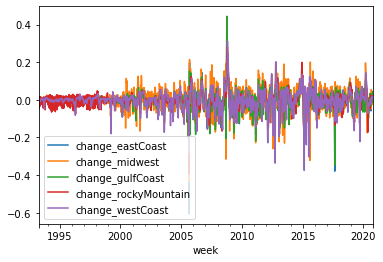

In [10]:
prices_df.plot(x = 'week', y=["change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"])

## Processs the data

In [11]:
#train test split
train_size = int(0.8 * len(prices_df))
prices_df_train = prices_df.iloc[0:train_size]
prices_df_test = prices_df.iloc[train_size:]

In [12]:
prices_df_train

,week,price_eastCoast,price_midwest,price_gulfCoast,price_rockyMountain,price_westCoast,change_eastCoast,change_midwest,change_gulfCoast,change_rockyMountain,change_westCoast
1,2020-11-02,2.149,2.026,1.862,2.320,2.869,0.022,0.001,0.039,0.016,0.006
2,2020-10-26,2.173,2.069,1.908,2.340,2.882,0.024,0.043,0.046,0.020,0.013
3,2020-10-19,2.196,2.057,1.905,2.359,2.887,0.023,-0.012,-0.003,0.019,0.005
4,2020-10-12,2.209,2.089,1.914,2.367,2.895,0.013,0.032,0.009,0.008,0.008
5,2020-10-05,2.208,2.106,1.901,2.376,2.903,-0.001,0.017,-0.013,0.009,0.008
...,...,...,...,...,...,...,...,...,...,...,...
1148,1998-11-09,1.038,1.026,0.998,1.120,1.169,0.007,0.026,0.007,-0.021,0.000
1149,1998-11-02,1.040,1.025,1.002,1.128,1.172,0.002,-0.001,0.004,0.008,0.003
1150,1998-10-26,1.041,1.032,1.007,1.136,1.175,0.001,0.007,0.005,0.008,0.003
1151,1998-10-19,1.044,1.038,1.014,1.138,1.174,0.003,0.006,0.007,0.002,-0.001


In [13]:
prices_df_test

,week,price_eastCoast,price_midwest,price_gulfCoast,price_rockyMountain,price_westCoast,change_eastCoast,change_midwest,change_gulfCoast,change_rockyMountain,change_westCoast
1153,1998-10-05,1.034,1.050,1.003,1.130,1.182,-0.012,0.005,-0.012,-0.018,0.004
1154,1998-09-28,1.029,1.041,0.995,1.135,1.187,-0.005,-0.009,-0.008,0.005,0.005
1155,1998-09-21,1.023,1.047,0.989,1.149,1.189,-0.006,0.006,-0.006,0.014,0.002
1156,1998-09-14,1.024,1.020,0.989,1.152,1.171,0.001,-0.027,0.000,0.003,-0.018
1157,1998-09-07,1.028,1.027,0.989,1.136,1.179,0.004,0.007,0.000,-0.016,0.008
...,...,...,...,...,...,...,...,...,...,...,...
1436,1993-05-03,1.062,1.073,1.084,1.161,1.161,-0.007,-0.018,-0.004,0.018,-0.010
1437,1993-04-26,1.059,1.078,1.081,1.169,1.157,-0.003,0.005,-0.003,0.008,-0.004
1438,1993-04-19,1.054,1.067,1.081,1.120,1.155,-0.005,-0.011,0.000,-0.049,-0.002
1439,1993-04-12,1.047,1.077,1.071,1.118,1.154,-0.007,0.010,-0.010,-0.002,-0.001


In [14]:
#function for making windows
def make_windows(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [15]:
time_steps = 5
X_train, y_train = make_windows(prices_df_train[["price_eastCoast", "price_midwest", "price_gulfCoast", "price_rockyMountain", "price_westCoast"]], prices_df_train[["price_eastCoast", "price_midwest", "price_gulfCoast", "price_rockyMountain", "price_westCoast"]], time_steps)
X_test, y_test = make_windows(prices_df_test[["price_eastCoast", "price_midwest", "price_gulfCoast", "price_rockyMountain", "price_westCoast"]], prices_df_test[["price_eastCoast", "price_midwest", "price_gulfCoast", "price_rockyMountain", "price_westCoast"]], time_steps)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1147, 5, 5) (1147, 5) (283, 5, 5) (283, 5)


## Build Model

In [16]:
from tensorflow import keras

In [17]:
model = keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    keras.layers.LSTM(units = 8, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False),
    keras.layers.Dense(units=5)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 448       
_________________________________________________________________
dense (Dense)                (None, 5)                 45        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=["mean_absolute_error"]
)

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=75,
    verbose=1,
    shuffle=False
)

Epoch 1/75
36/36 [==============================] - 0s 3ms/step - loss: 7.2787 - mean_absolute_error: 2.5318
Epoch 2/75
36/36 [==============================] - 0s 2ms/step - loss: 5.3595 - mean_absolute_error: 2.1389
Epoch 3/75
36/36 [==============================] - 0s 2ms/step - loss: 3.9489 - mean_absolute_error: 1.7813
Epoch 4/75
36/36 [==============================] - 0s 2ms/step - loss: 2.6515 - mean_absolute_error: 1.4069
Epoch 5/75
36/36 [==============================] - 0s 2ms/step - loss: 1.6829 - mean_absolute_error: 1.0711
Epoch 6/75
36/36 [==============================] - 0s 2ms/step - loss: 1.1368 - mean_absolute_error: 0.8581
Epoch 7/75
36/36 [==============================] - 0s 2ms/step - loss: 0.8468 - mean_absolute_error: 0.7379
Epoch 8/75
36/36 [==============================] - 0s 2ms/step - loss: 0.6756 - mean_absolute_error: 0.6591
Epoch 9/75
36/36 [==============================] - 0s 3ms/step - loss: 0.5579 - mean_absolute_error: 0.5996
Epoch 10/75
36/36 [

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([[0.99147534, 1.0404066 , 0.99711025, 1.1325665 , 1.1763488 ],
       [0.9980605 , 1.0473287 , 1.00087   , 1.1394095 , 1.184303  ],
       [1.0064001 , 1.0562049 , 1.0069886 , 1.1467913 , 1.1936619 ],
       ...,
       [1.0234807 , 1.066607  , 1.0356315 , 1.1350114 , 1.1912872 ],
       [1.0121417 , 1.0547619 , 1.0233364 , 1.1229078 , 1.1788191 ],
       [1.0073977 , 1.0491333 , 1.0196155 , 1.1189232 , 1.1739442 ]],
      dtype=float32)

In [23]:
y_test

array([[1.034, 1.032, 0.999, 1.151, 1.184],
       [1.038, 1.035, 1.01 , 1.161, 1.192],
       [1.042, 1.048, 1.012, 1.166, 1.196],
       ...,
       [1.054, 1.067, 1.081, 1.12 , 1.155],
       [1.047, 1.077, 1.071, 1.118, 1.154],
       [1.04 , 1.061, 1.064, 1.093, 1.152]])

In [24]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0418


[0.002781445160508156, 0.041791416704654694]

In [25]:
model.metrics_names

['loss', 'mean_absolute_error']

In [26]:
import matplotlib.pyplot as plt

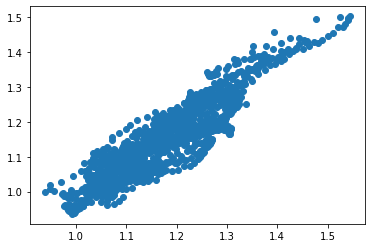

In [27]:
plt.scatter(y_test, y_pred)

In [28]:
y_err = np.abs(y_pred - y_test)

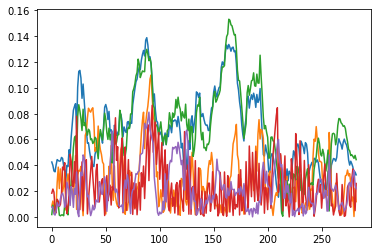

In [29]:
plt.plot(y_err)

## Save Model

In [30]:
#model.save("test_model.h5")

In [31]:
#!tensorflowjs_converter --input_format keras "test_model.h5" ./jsmodel